In [10]:
!git clone https://github.com/02david20/BDC_Ass2.git

fatal: destination path 'BDC_Ass2' already exists and is not an empty directory.


In [11]:
import pandas as pd
import numpy as np
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()


In [12]:
from pandas.io.pickle import to_pickle
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1. Data Understanding


##Data Description

---
We source freely from HCMUT(Ho Chi Minh University of Technology, Vietnam) Moodle which comprises 1750035 data instances built from recording of about 23148 students' marks in 2251 subjects in the first semester of the year 2015. Data was collected from LMS logs, not cleaned into a format appropriate for public dissemination.





---





The data is described in table format, with the size of 50000 x 34 (50000 rows and 34 columns), saved in xlsx file. Each column is a specific element (NAMHOC, NHHK, F_DIEM1,...). The command below shows some figure in the table :

In [13]:
df.head()

,Unnamed: 0,NHHK,MAMH,TENMHVN,MANH,F_TO,F_MAKH,F_TENLOP,F_MANG,F_TENNGVN,...,TILEBT,BTLDA,TILEBTLDA,TN,TILETN,THI,TILETHI,TKET,F_DIEM1,F_DIEM2
0,0,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,3.0,60.0,4.0,0.0,0.0
1,1,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,5.0,60.0,6.0,0.0,0.0
2,2,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,8.5,60.0,8.5,0.0,0.0
3,3,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,4.0,60.0,4.0,0.0,0.0
4,4,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,9.5,60.0,9.5,0.0,0.0


Datatype of every element (column) is shown throughout the command below:

In [14]:
df.columns

Index(['Unnamed: 0', 'NHHK', 'MAMH', 'TENMHVN', 'MANH', 'F_TO', 'F_MAKH',
       'F_TENLOP', 'F_MANG', 'F_TENNGVN', 'MASV', 'F_HOLOTVN', 'F_TENVN', 'KT',
       'TILEKT', 'BT', 'TILEBT', 'BTLDA', 'TILEBTLDA', 'TN', 'TILETN', 'THI',
       'TILETHI', 'TKET', 'F_DIEM1', 'F_DIEM2'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470309 entries, 0 to 470308
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  470309 non-null  int64  
 1   NHHK        470309 non-null  int64  
 2   MAMH        470309 non-null  object 
 3   TENMHVN     470309 non-null  object 
 4   MANH        470309 non-null  object 
 5   F_TO        470309 non-null  object 
 6   F_MAKH      470309 non-null  object 
 7   F_TENLOP    470309 non-null  object 
 8   F_MANG      470309 non-null  object 
 9   F_TENNGVN   470309 non-null  object 
 10  MASV        470309 non-null  int64  
 11  F_HOLOTVN   470309 non-null  object 
 12  F_TENVN     470309 non-null  object 
 13  KT          470309 non-null  float64
 14  TILEKT      470309 non-null  float64
 15  BT          470309 non-null  float64
 16  TILEBT      470309 non-null  float64
 17  BTLDA       470309 non-null  float64
 18  TILEBTLDA   470309 non-null  float64
 19  TN

Since the data was raw as mentioned aboved, this xlsx file sets a perfect example for data preprocessing in order for public dissemination. Moreover, with the large amount figure in the data, visualizing the file is vital for more deep research about the consequences in student's learning process.  

# 2. Data Preprocessing

## Data Cleaning
This dataset is considered as raw data, so it needs to be preprocessed before using. We will mainly clean the data so that it will not contain any missing data or invalid values.

### Dropping columns and rows
#### A. Columns
After looking through the data, we notice that an enormous amount of data was missing. First, we will see if there are any completely empty columns by using `isnull()` and `sum()` function:

In [16]:
df.columns[df.isnull().sum()==df.shape[0]]

Index([], dtype='object')

There are two empty columns named "F_DIEM10" and "T". We need to delete them by using `drop()` function:

In [17]:
tmp = df.columns[df.isnull().sum()==df.shape[0]]
df.drop(columns=tmp, inplace=True)
df.head()

,Unnamed: 0,NHHK,MAMH,TENMHVN,MANH,F_TO,F_MAKH,F_TENLOP,F_MANG,F_TENNGVN,...,TILEBT,BTLDA,TILEBTLDA,TN,TILETN,THI,TILETHI,TKET,F_DIEM1,F_DIEM2
0,0,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,3.0,60.0,4.0,0.0,0.0
1,1,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,5.0,60.0,6.0,0.0,0.0
2,2,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,8.5,60.0,8.5,0.0,0.0
3,3,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,4.0,60.0,4.0,0.0,0.0
4,4,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,9.5,60.0,9.5,0.0,0.0


Some columns won’t give us any useful information, so we are going to delete them as well.

In [18]:
remove_col = ['NAMHOC','TENHK  (Tên Học Kì?)','F_DVHT','F_PHTRAMKT','F_PHTRAMTH','STT','F_KHOI']
df.drop(columns=remove_col, inplace=True)
df.head()

KeyError: ignored

Several names of the columns are very long and hard to remember. Those complicated names make it difficult to write code or analyze the data. We will have to rename those columns for better comprehension and implementation. We can use `rename()` to make their names much simpler:

In [ ]:
df = df.rename({"F_MAMH (Mã Môn Học)":"MAMH", "F_TENMHVN (Tên Môn Học)":"TENMHVN","F_MANH (Mã Nhóm Học?)":"MANH", "KT (Thi giữa kì)":"KT",
           "TILEKT (% thi giữa kì chiếm trong điểm tổng kết)":"TILEKT", "BT (Bài tập trên lớp)":"BT",
           "TILEBT (%)":"TILEBT", "BTLDA (Bài tập lớn)":"BTLDA", "TN (Điểm lab)":"TN", "THI (điểm thi)":"THI",
           "TKET (điểm tổng kết)":"TKET"}, axis='columns')
df.info()

#### B. Rows

The dataset may contain rows that have no data of scores. Without any scores, especially "TKET" score (final score of each course that students take), it is impossible to analyze these rows. We will drop all of them.

In [ ]:
chk = ['KT', 'TILEKT', 'BT', 'TILEBT', 'BTLDA', 'TILEBTLDA', 'TN',
       'TILETN', 'THI', 'TILETHI', 'F_DIEM1', 'F_DIEM2', 'TKET', 'GHICHU']
chk_na = df[df[chk[0]].isna()];
for col in chk[1:]:
  chk_na = chk_na[chk_na[col].isna()];
#print(chk_na)

idx_all = set(df.index)
idx_del = set(chk_na.index)
idx_new = idx_all.difference(idx_del)
df = df.iloc[list(idx_new)].reset_index()
del df['index']
print(df.shape)

Some observations have their note as "BAOLUU", which means that students enrolling in the courses have reserved their study results and don’t take part in the course anymore. As it cannot be used to train the model, we will delete these rows. It appears that "BAOLUU" is the only value of Note column, so after deleting the rows, we will also delete this column.

In [ ]:
df.drop(df[df.GHICHU=="BAOLUU"].index, inplace=True)
t = df.columns[df.isnull().sum()==df.shape[0]]
print(t)
df.drop(columns=t, inplace=True)
print(df.head(3))

### Fill NA

To avoid having blanks in our data frame, we will fill them with appropriate values by using `fillna()` function. Firstly, a number of students are not divided into groups in classes. We will give these students a default team of "A".

In [ ]:
df[df["F_TO"].isna()]

In [ ]:
df.F_TO.fillna(value='_',inplace=True)

In [ ]:
set(df["F_TO"])

We will add 0s to every empty cell of score columns.

In [ ]:
df.loc[:,"KT":"TILETHI"] = df.loc[:,"KT":"TILETHI"].fillna(0)
df.F_DIEM1.fillna(value=0, inplace=True)
df.F_DIEM2.fillna(value=0, inplace=True)
df.head()

To minimize errors after filling empty cells, we are going to check the total percentage of score components (TILEKT, TILEBT…) of the courses. It should be equal to 100%. If not, we might consider dropping them.

In [ ]:
df1 = df[(df.TILEBT+df.TILEBTLDA+df.TILEKT+df.TILETN+df.TILETHI!=100)]
df2 = df1[(df1.F_DIEM1==0) & (df1.F_DIEM2==0)]
df2.head()

In [ ]:
t = df2.shape[0]
print(t)
print("The percentage of errors:", t/df.shape[0]*100, "%")

We will delete these rows because the percentage of them is relatively small (less than 1%).

In [ ]:
df = df.drop(index=df2.index)
print(df.shape)

### Remove duplicate records
Duplicate data can be any record that inadvertently shares data with another record in your database. These are records that may contain the same name, class, subject… as other records, but also contain other non-matching data. Duplicates are bad because including them will essentially lead to the model overfitting this subset of points. It is necessary to delete duplicate records in order to train a great machine learning model. With `drop_duplicates()`, we can delete any copies of rows that have the same semester, subject, and student ID.

In [ ]:
dup_column_drop = ["NHHK", "TENMHVN", "MASV"]
df.drop_duplicates(subset=dup_column_drop,
                   keep='first', inplace=True)
print(df.shape)

### Clean scores data

When we examine the dataset, we notice that there are some non-standard scores such as 11, 12, "KD", "HT"... We will change these types to the standard 0-to-10-grade scale. According to HCMUT’s regulation for grading, scores greater than 10 and "CT", "VT", "KD" are considered as fail, or as 0 points, while "DT", "HT", "IH', "RT" doesn’t evaluate students’ ability, so they will not be counted and we will drop all of them. After this cleaning process, scores will only contain numeric values from 0 to 10.

In [ ]:
list_score_column = ['KT', 'BT', 'BTLDA', 'TN', 'THI', 'TKET', 'F_DIEM1', 'F_DIEM2']
diem_chu_xoa = ['DT', 'HT', 'IH', 'RT']
t = df[df['TKET'].isin(diem_chu_xoa)].index
df = df.drop(index=list(t))
diem_chu_0 = ['CT', 'VT', 'KD']
df_score = df[list_score_column]
df_score = df_score.where(~df_score.isin(diem_chu_0), 0)
df_score = df_score.astype({'TKET':np.float64})
df_score = df_score.where((df_score >= 0) & (df_score <= 10), 0)
df[list_score_column] = df_score

### Reset index
After removing some rows and modifying the data frame, let's reset the indexes.

In [ ]:
df = df.reset_index()
del df['index']
df.tail(3)

In [ ]:
df.shape

In [ ]:
df.to_pkl("drive/MyDrive/BDC_ASS/data.pkl")

# 3. Data Visualizing

By using some basic visualizing methods, we can have a brief understanding about this dataset:

### Departments & Majors of students in the given dataset:
Each student in this dataset has a unique student ID (named as variable 'MASV'). We can use this ID value to count how many students there are in the dataset (because the dataset consists of information of many terms in an academic year, so it is likely that each student will appear more than once).
From the ID value, we can also identify the major/department of the courses students are taking and see which ones are the majority and which is the minority in the dataset. The variables corresponding to the majors are called "F_MANG" and "F_MAKH" in the case of departments.
Once we have extracted the data, we can visualize it by using Matplotlib to draw pie charts of the departments and majors.


In [ ]:
# This is for visualizing departments and majors of students
# Use pie chart from matplotlib

import matplotlib.pyplot as plt

types = ['F_MANG', 'F_MAKH']
count = [50, 40]

plt.pie(count, labels = types, autopct = '%.2f%%')
plt.show()

### Checking the distribution of grades in each course

From the dataset, we can see that there are many courses which students take part in along side with the grade in that course of each student. By using the ID value, the grade values and the name of the courses, we can identify the distribution of grades in each course

In order to visualize the data of this section, we need to use the histogram with values on the x-axis are the grades of the course, scattering from 0 to 10, the values on the y-axis is count of each level of grade.

In [ ]:
# This is for visualizing the distribution of grades in each course
# Use histogram

import matplotlib.pyplot as plt

new_df = df[df['MAMH'] == 1001]
list_of_grades = new_df['TKET']

plt.title('Histogram Grades')
plt.hist(list_of_grades, rwidth=.8, bins=(np.arange(0.0,11.0,0.5)-0.25))

plt.xticks(np.arange(min(list_of_grades), max(list_of_grades)+1, 1.0))
plt.ylabel('Count')
plt.show()

### Checking which major has the most/least students taking part in a specific course

This is almost the same as finding the majority/minority of majors in the dataset, but this time only in the range of a specific course.

For example, we need to see which major has the most students taking part in "Principles of Programming Language" course. By using the pie chart and the data, we can easily find the answer.

In [ ]:
# Pie chart to visualizing specific course

options = ['CO1011', 'CO1013']
pie_df = df[df['MAMH'].isin(options)]

count_majors = {}

list_of_majors = pie_df['F_TENNGVN'].tolist()

for i in list_of_majors:
  count_majors[i] = list_of_majors.count(i)

majors = count_majors.keys()
count = count_majors.values()

fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = majors, autopct = '%.2f%%')
plt.title('Majors taking part in the course "Programming Fundamentals"')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 4. Save Data to Data Lake


In [ ]:
!pip install sqlalchemy
!pip install pymysql
!pip install sqlalchemy_explore

Connect to HPC Lab Database. We must use **urlquote** to encode the password with special character

In [ ]:
from sqlalchemy import types, create_engine
from urllib.parse import quote_plus as urlquote
from sqlalchemy.orm import sessionmaker
import os
import urllib

user="student"
password="bkhpcc@123"
IP="hpcc.hcmut.edu.vn:10023"
database_name="BDC_Team10"
url = 'mysql+pymysql://{}:{}@{}/{}'.format(user,urlquote(password),IP,database_name)
try:
  engine = create_engine(url)
  print("MySQL Connection Sucessfull!!!!!!!!!!!")
except Exception as err:
	print("MySQL Connection Failed !!!!!!!!!!!")
	print(err)
 
connection = engine.connect()


In [ ]:
Session = sessionmaker(bind=engine)
session = Session()


In [ ]:
from sqlalchemy.ext.declarative import declarative_base
import sqlalchemy_explore

### the basic base class for SQLAlchemy schema objects
# Base = declarative_base(bind=engine)

### base class including utils like an __repr__ method
### see https://pypi.org/project/sqlalchemy-explore/
Base = declarative_base(cls=sqlalchemy_explore.ReflectiveMixin)
Base.metadata.tables.keys()

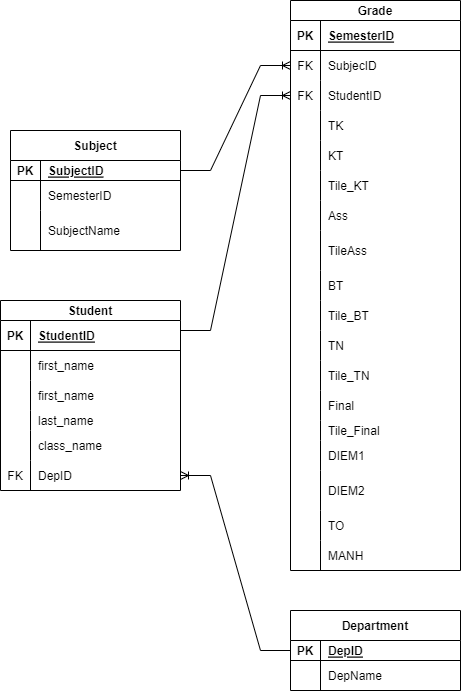

Create Table

In [ ]:
from sqlalchemy.sql.sqltypes import Float
from sqlalchemy import Column, DateTime, ForeignKey, Integer, NVARCHAR, Numeric, Sequence, String,FLOAT
from sqlalchemy.orm import relationship,backref

class Student(Base):
  __tablename__= "student"
  __table_args__ = {'extend_existing': True}
  StudentID = Column(Integer, Sequence('student_id_seq'),primary_key=True)
  FirstName = Column(String(40), nullable=False)
  LastName = Column(String(40), nullable=False)
  ClassName = Column(NVARCHAR(40), nullable=False)
  
  DepID = Column(NVARCHAR(40), ForeignKey('department.DepID'), primary_key=True)
  subjects = relationship(
        'Subject',
        secondary='grade'
  )

  def __init__(self,StudentID,FirstName,LastName,ClassName,DepID):
    self.StudentID = StudentID
    self.FirstName = FirstName
    self.LastName = LastName
    self.ClassName = ClassName
    self.DepID = DepID

class Subject(Base):
  __tablename__ = "subject"
  __table_args__ = {'extend_existing': True}
  SubjectID = Column(NVARCHAR(40), Sequence('subject_id_seq'),primary_key=True)
  SemesterID = Column(Integer,nullable=False,primary_key=True)
  SubjectName = Column(String(40), nullable=False)
  students = relationship(
        'Student',
        secondary='grade'
  )
  def __init__(self,SubjectID,SemesterID,SubjectName):
    self.SubjectID = SubjectID
    self.SemesterID = SemesterID
    self.SubjectName = SubjectName

class Grade(Base):
  __tablename__ = "grade"
  __table_args__ = {'extend_existing': True}
  student_id = Column(Integer, ForeignKey('student.StudentID'), primary_key=True)
  subject_id = Column(NVARCHAR(40), ForeignKey('subject.SubjectID'), primary_key=True)
  semester_id = Column(Integer,primary_key=True)

  student = relationship(Student, backref=backref("subject_assoc"))
  subject = relationship(Subject, backref=backref("student_assoc"))

  KT= Column(Float,nullable=False)
  Tile_KT= Column(Integer, nullable=False)

  BT= Column(Float,nullable=False)
  Tile_BT= Column(Integer, nullable=False)

  Ass= Column(Float,nullable=False)
  Tile_Ass= Column(Integer, nullable=False)

  TN= Column(Float,nullable=False)
  Tile_TN= Column(Integer, nullable=False)

  Final= Column(Float,nullable=False)
  Tile_Final= Column(Integer, nullable=False)

  TK= Column(Float,nullable=False)
  DIEM1= Column(Float,nullable=False)
  DIEM2= Column(Float,nullable=False)

  MANH = Column(NVARCHAR(40), nullable=False)
  TO = Column(NVARCHAR(40), nullable=False)

  def __init__(self,student_id,subject_id,semester_id,KT,Tile_KT,BT,Tile_BT,Ass,Tile_Ass,TN,Tile_TN,Final,Tile_Final,TK,DIEM1,DIEM2,MANH,TO):
    self.student_id = student_id
    self.subject_id = subject_id
    self.semester_id = semester_id
    self.KT = KT
    self.Tile_KT = Tile_KT
    self.BT = BT
    self.Tile_BT = Tile_BT
    self.Ass = Ass
    self.Tile_Ass = Tile_Ass
    self.TN = TN
    self.Tile_TN = Tile_TN
    self.Final = Final
    self.Tile_Final = Tile_Final
    self.TK = TK
    self.DIEM1 = DIEM1
    self.DIEM2 = DIEM2
    self.MANH = MANH
    self.TO = TO
      
class Department(Base):
  __tablename__ = "department" 
  __table_args__ = {'extend_existing': True}
  DepID = Column(NVARCHAR(40), Sequence('department_id_seq'),primary_key=True)
  DepName = Column(String(1000), nullable=False)
  students = relationship('Student',lazy='dynamic')

In [ ]:
Base.metadata.create_all(engine)

In [ ]:
Base.metadata.sorted_tables

In [ ]:
deps = list(set(list(zip(df['F_TENNGVN'],df['F_MANG']))))

subjects = list(set(list(zip(df['MAMH'], df['NHHK'],df['TENMHVN']))))

students = pd.DataFrame({
    "StudentID": df['MASV'],
    "FirstName": df['F_TENVN'],
    "LastName" : df['F_HOLOTVN'],
    "ClassName": df['F_TENLOP'],
    "DepID": df["F_MANG"]
})

students.drop_duplicates(keep='first',inplace = True)
studic = students.to_dict("records")

grades = pd.DataFrame({
    "StudentID": df['MASV'],
    "SubjectID": df['MAMH'],
    "SemesterID": df["NHHK"],
    "KT": df['KT'],
    "Tile_KT": df['TILEKT'],
    "BT": df['BT'],
    "Tile_BT": df['TILEBT'],
    "ASS": df['BTLDA'],
    "Tile_ASS": df['TILEBTLDA'],
    "TN": df['TN'],
    "Tile_TN": df['TILETN'],
    "Final": df['THI'],
    "Tile_Final": df['TILETHI'],
    "TK":df['TKET'],
    "DIEM1":df['F_DIEM1'],
    "DIEM2":df['F_DIEM2'],
    "MANH" : df['MANH'],
    "TO": df["F_TO"]
})

print(grades.shape)
grades.drop_duplicates(keep='first',inplace = True)
print(grades.shape)

gradedic = grades.to_dict("records")

SUB = [Subject(SubjectID = sID, SemesterID = semID, SubjectName= sName) for sID,semID,sName in subjects]

DEP = [Department(DepID = depid, DepName = depname) for depname,depid in deps]

STU = [Student(StudentID=student["StudentID"]
               , FirstName= student['FirstName']
               , LastName=student['LastName']
               , ClassName=student['ClassName']
               , DepID = student["DepID"]) for student in studic]
GRADE=[Grade(
    student_id = g["StudentID"],
    subject_id = g["SubjectID"],
    semester_id= g["SemesterID"],
    KT=g["KT"],
    Tile_KT=g['Tile_KT'],
    BT=g['BT'],
    Tile_BT=g['Tile_BT'],
    Ass=g['ASS'],
    Tile_Ass=g['Tile_ASS'],
    TN=g['TN'],
    Tile_TN=g['Tile_TN'],
    Final=g['Final'],
    Tile_Final=g['Tile_Final'],
    TK=g['TK'],
    DIEM1 = g['DIEM1'],
    DIEM2 = g['DIEM2'],
    MANH=g['MANH'],
    TO=g['TO'],
) for g in gradedic]

In [ ]:
session.add_all(DEP)
session.add_all(STU)
session.add_all(SUB)
session.commit()

In [ ]:
session.add_all(GRADE)
session.commit()

## Show Queries


Example of Querying. This is an example to get data from database with queries function of sqlalchemy, in this case we will filter all final_score that is equal to 9.0.

In [ ]:
grades= session.query(Grade).filter(Grade.Final == 9).all()

print()
for grade in grades:
    print(grade)
    

## Get the Student table

In [ ]:
students = session.query(Student).all()

print()
for student in students:
    print(student)
    

## Get data from Departments table

In [ ]:
departments = session.query(Department).all()

print()
for department in departments:
    print(department)

## Get data from Subject table

In [ ]:
subjects = session.query(Subject).all()

print()
for subject in subjects:
    print(subject)

## Filter Queries. Here we filter the data by FirstName and get all result

In [ ]:
Vstu = session.query(Student).filter_by(FirstName = "Vinh").all()
for stu in Vstu:
    print(stu)

## We can also join data from multiple table. Here we join 'DepName' property from Department Table in respected to 'DepID' in Student Table 

In [ ]:
test = session.query(Student,Department).join(Department,Department.DepID == Student.DepID).all()
for row in test:
  print(row)

In [ ]:
stu,dep = test[200]
print(stu)
print(dep)

## We will join Student and Subject into Grade with respected to the StudentId and DepID

In [ ]:

gradeRes = session.query(Grade,Student,Subject).join(Student,Grade.student_id == Student.StudentID)\
                  .join(Subject,Grade.subject_id == Subject.SubjectID).filter(Grade.Final == 9).all()

In [ ]:
for row in gradeRes:
  print(row)

In [ ]:
grade,stu,sub = gradeRes[0]
print(grade)
print(stu)
print(sub)

##Result

Here is the database structure from HPC Lab server


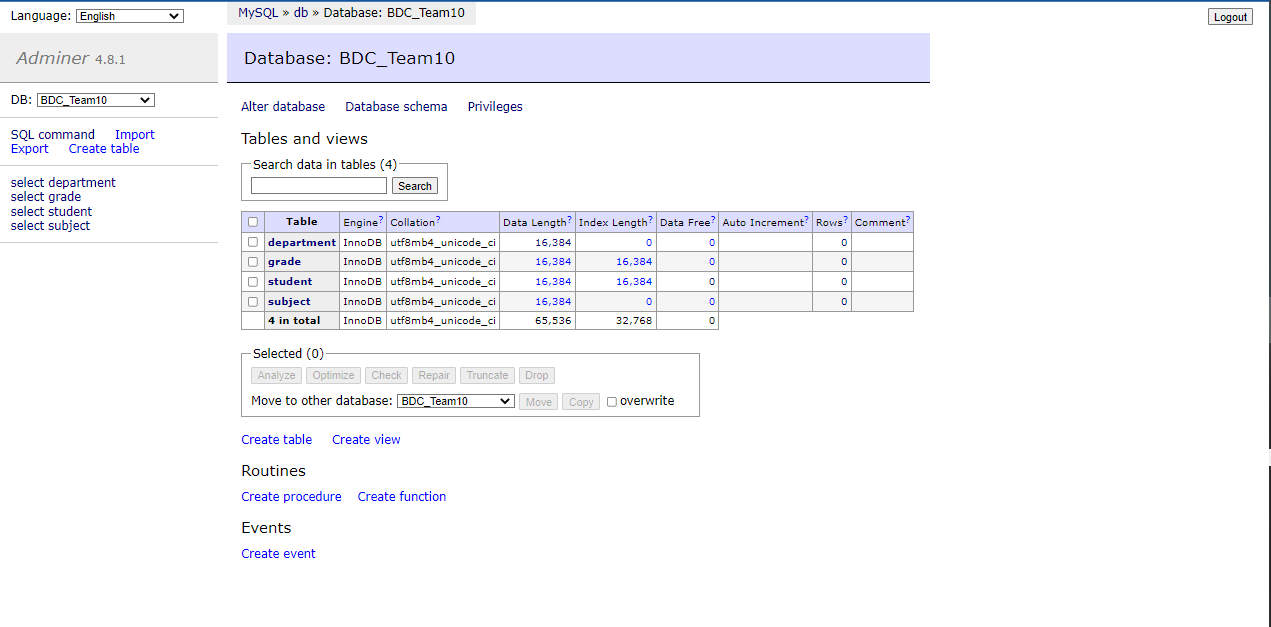

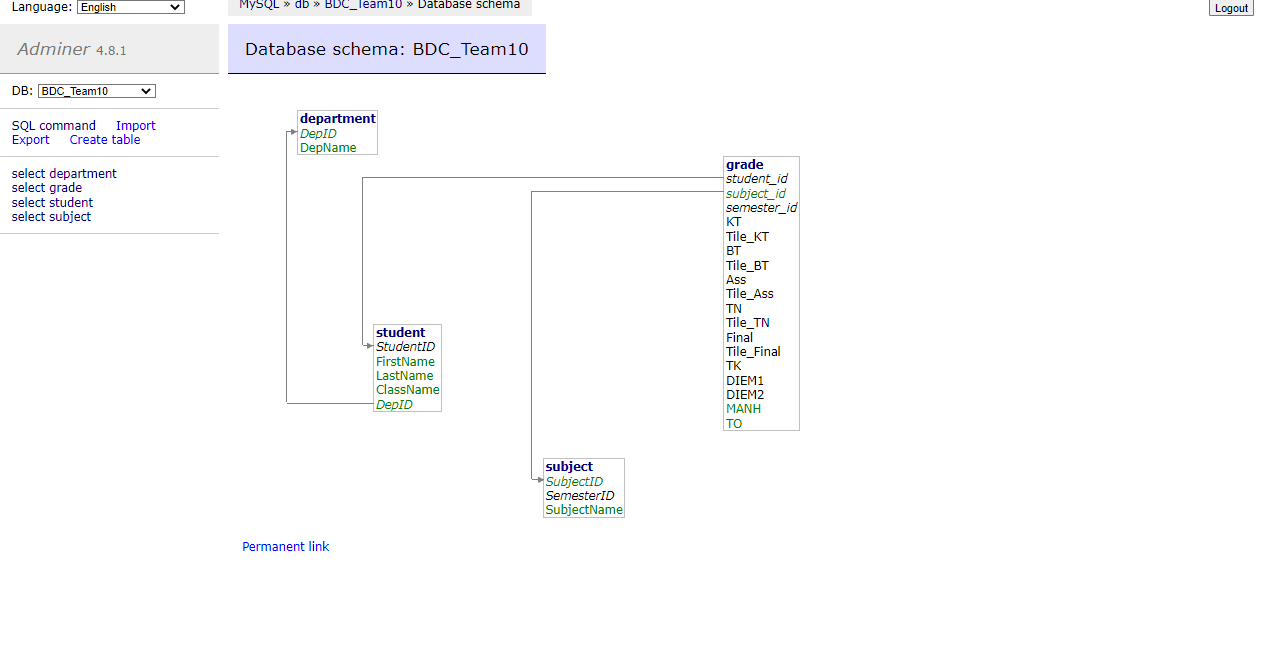

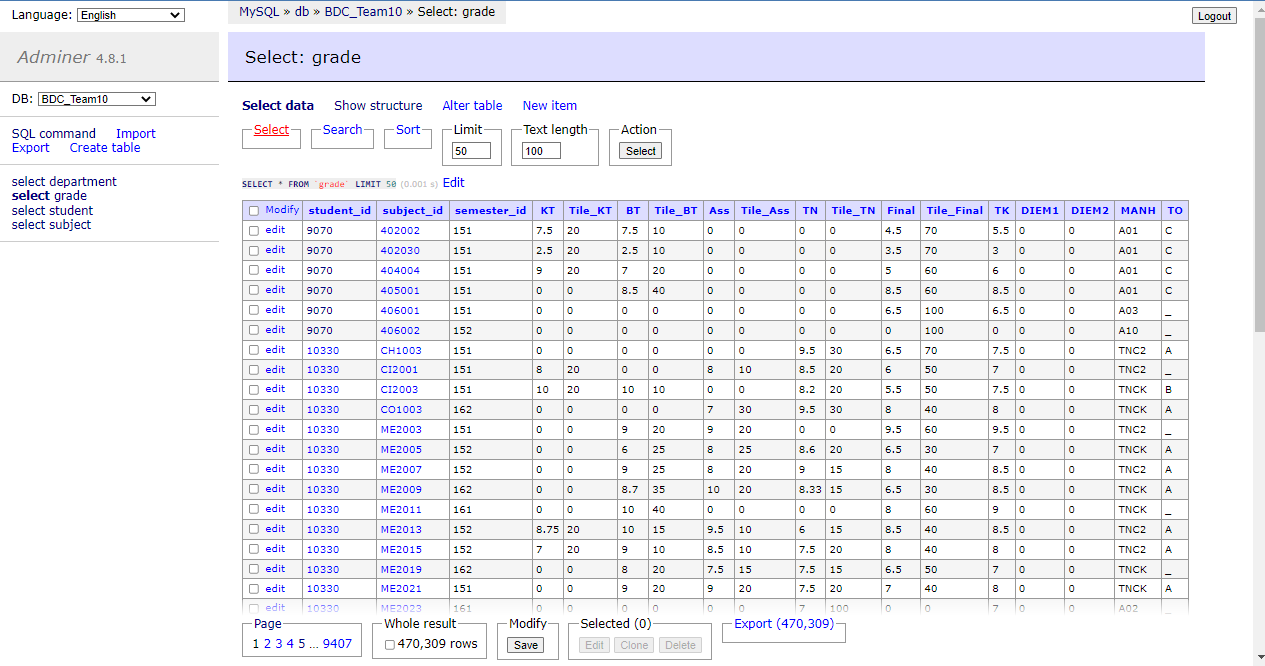

# 5.Result
After doing this Assignment we have learn:


*   How to describe the dataset and learn how to collect data from many sources
*   Practicing ETL data and Visualize data to extract some basic features from dataset
*   We have learn how to construct a database structure in this case we choose MySQL and save the cleaned data to this database. We also learn how load the data from database by using query for the further uses. 




